<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.177916,28.033326,69.959367,-80.875841,77.294768,231.488056,-154.193288
1,0.0,1.0,76.444416,70.187774,55.412675,-384.832171,-172.787306,169.714945,-342.502250
2,0.0,2.0,95.028703,41.509797,82.529989,-84.436705,144.631784,-24.853301,169.485085
3,0.0,3.0,81.073996,66.962934,78.740238,1070.434866,1307.212034,169.002699,1138.209335
4,0.0,4.0,51.692176,20.652551,58.958920,-178.514422,-37.210775,170.192626,-207.403400
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,80.584018,50.308289,22.564361,227.664202,391.120869,74.365719,316.755150
59996,999.0,56.0,29.094370,90.962964,35.109992,-742.459207,-577.291881,530.296489,-1107.588370
59997,999.0,57.0,76.235320,54.572002,45.755117,1030.226557,1216.788996,65.277374,1151.511622
59998,999.0,58.0,75.204545,29.190073,70.955549,-44.264190,141.085977,-76.294310,217.380287


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.177916,28.033326,69.959367,-80.875841,77.294768,231.488056,-154.193288
1,0.0,1.0,76.444416,70.187774,55.412675,-384.832171,-172.787306,169.714945,-342.502250
2,0.0,2.0,95.028703,41.509797,82.529989,-84.436705,144.631784,-24.853301,169.485085
3,0.0,3.0,81.073996,66.962934,78.740238,1070.434866,1307.212034,169.002699,1138.209335
4,0.0,4.0,51.692176,20.652551,58.958920,-178.514422,-37.210775,170.192626,-207.403400
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,80.584018,50.308289,22.564361,227.664202,391.120869,74.365719,316.755150
59996,999.0,56.0,29.094370,90.962964,35.109992,-742.459207,-577.291881,530.296489,-1107.588370
59997,999.0,57.0,76.235320,54.572002,45.755117,1030.226557,1216.788996,65.277374,1151.511622
59998,999.0,58.0,75.204545,29.190073,70.955549,-44.264190,141.085977,-76.294310,217.380287


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    50.177916  28.033326  ...  231.488056  -154.193288
      1.0    76.444416  70.187774  ...  169.714945  -342.502250
      2.0    95.028703  41.509797  ...  -24.853301   169.485085
      3.0    81.073996  66.962934  ...  169.002699  1138.209335
      4.0    51.692176  20.652551  ...  170.192626  -207.403400
...                ...        ...  ...         ...          ...
999.0 55.0   80.584018  50.308289  ...   74.365719   316.755150
      56.0   29.094370  90.962964  ...  530.296489 -1107.588370
      57.0   76.235320  54.572002  ...   65.277374  1151.511622
      58.0   75.204545  29.190073  ...  -76.294310   217.380287
      59.0   34.157477  35.840849  ...  289.682012    89.675278

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    50.177916  28.033326  ...  231.488056  -154.193288
      1.0    76.444416  70.187774  ...  169.714945  -342.502250
      2.0    95.028703  41.509797  ...  -24.853301   169.485085
      3.0    81.073996  66.962934  ...  169.002699  1138.209335
      4.0    51.692176  20.652551  ...  170.192626  -207.403400
...                ...        ...  ...         ...          ...
999.0 55.0   80.584018  50.308289  ...   74.365719   316.755150
      56.0   29.094370  90.962964  ...  530.296489 -1107.588370
      57.0   76.235320  54.572002  ...   65.277374  1151.511622
      58.0   75.204545  29.190073  ...  -76.294310   217.380287
      59.0   34.157477  35.840849  ...  289.682012    89.675278

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.177916,28.033326,69.959367,-80.875841,77.294768,231.488056,-154.193288
1,0.0,1.0,76.444416,70.187774,55.412675,-384.832171,-172.787306,169.714945,-342.502250
2,0.0,2.0,95.028703,41.509797,82.529989,-84.436705,144.631784,-24.853301,169.485085
3,0.0,3.0,81.073996,66.962934,78.740238,1070.434866,1307.212034,169.002699,1138.209335
4,0.0,4.0,51.692176,20.652551,58.958920,-178.514422,-37.210775,170.192626,-207.403400
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,80.584018,50.308289,22.564361,227.664202,391.120869,74.365719,316.755150
59996,999.0,56.0,29.094370,90.962964,35.109992,-742.459207,-577.291881,530.296489,-1107.588370
59997,999.0,57.0,76.235320,54.572002,45.755117,1030.226557,1216.788996,65.277374,1151.511622
59998,999.0,58.0,75.204545,29.190073,70.955549,-44.264190,141.085977,-76.294310,217.380287


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    50.177916  28.033326  ...  231.488056  -154.193288
      1.0    76.444416  70.187774  ...  169.714945  -342.502250
      2.0    95.028703  41.509797  ...  -24.853301   169.485085
      3.0    81.073996  66.962934  ...  169.002699  1138.209335
      4.0    51.692176  20.652551  ...  170.192626  -207.403400
...                ...        ...  ...         ...          ...
999.0 55.0   80.584018  50.308289  ...   74.365719   316.755150
      56.0   29.094370  90.962964  ...  530.296489 -1107.588370
      57.0   76.235320  54.572002  ...   65.277374  1151.511622
      58.0   75.204545  29.190073  ...  -76.294310   217.380287
      59.0   34.157477  35.840849  ...  289.682012    89.675278

[60000 rows x 7 columns]

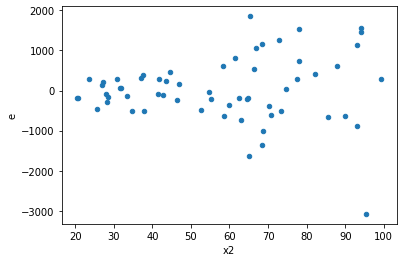

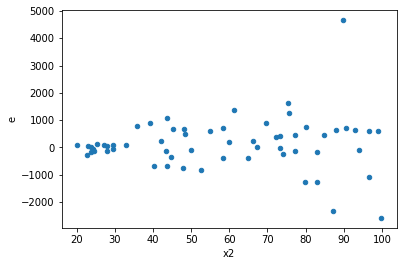

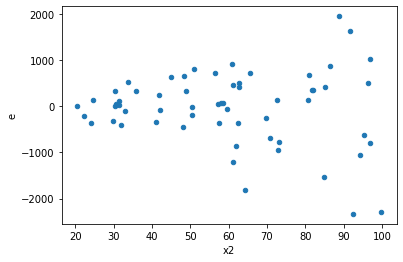

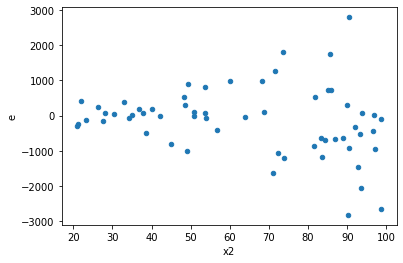

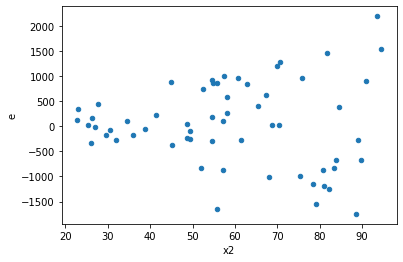

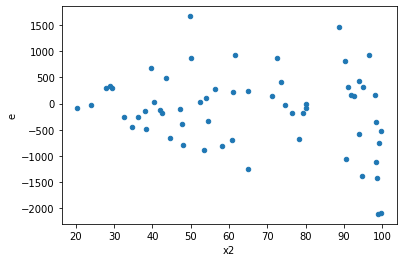

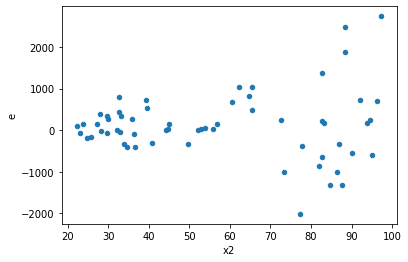

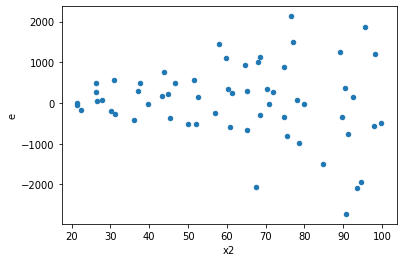

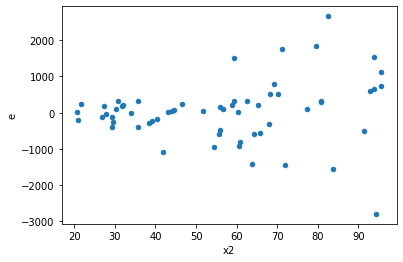

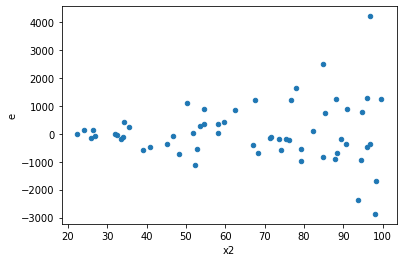

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,1486435.7690347617,26800000.159452036,70782.65566832198,1276190.4837834302,18.029706172137526,8.33179192305522e-09,0.999999995834104,4.16589596152761e-09,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,4883753.956450527,43646625.45139708,232559.71221192984,2078410.7357808135,8.937105726579048,4.895849142760866e-06,0.9999975520754286,2.447924571380433e-06,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,2441255.1479997584,29385034.59504086,116250.24514284564,1399287.3616686123,12.036855147696249,3.541477262558601e-07,0.9999998229261369,1.7707386312793005e-07,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,4186382.447494649,29735142.1633992,199351.5451187928,1415959.1506380572,7.10282506109643,3.354354421225558e-05,0.9999832282278939,1.677177210612779e-05,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,3837800.4118124866,27831970.20382089,182752.40056249936,1325331.9144676614,7.252062957249156,2.8298116986125166e-05,0.9999858509415069,1.4149058493062583e-05,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,7092041.108719378,15572929.897485865,337716.24327235133,741568.0903564697,2.1958318710729943,0.07857779057247138,0.9607111047137643,0.03928889528623569,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,1825699.6937452648,31164879.3491222,86938.08065453642,1484041.8737677238,17.070101646996584,1.3985311353437169e-08,0.9999999930073443,6.992655676718584e-09,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,3137296.625028108,26124632.274340928,149395.07738229085,1244030.108301949,8.327115793237075,8.944061808291437e-06,0.9999955279690959,4.4720309041457185e-06,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,1980739.8117548637,33852760.085938044,94320.94341689827,1612036.1945684783,17.090967670279582,1.382489389634145e-08,0.999999993087553,6.912446948170725e-09,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1486435.7690347617,26800000.159452036,70782.65566832198,1276190.4837834302,18.029706172137526,8.33179192305522e-09,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,4883753.956450527,43646625.45139708,232559.71221192984,2078410.7357808135,8.937105726579048,4.895849142760866e-06,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,2441255.1479997584,29385034.59504086,116250.24514284564,1399287.3616686123,12.036855147696249,3.541477262558601e-07,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,4186382.447494649,29735142.1633992,199351.5451187928,1415959.1506380572,7.10282506109643,3.354354421225558e-05,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,3837800.4118124866,27831970.20382089,182752.40056249936,1325331.9144676614,7.252062957249156,2.8298116986125166e-05,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,7092041.108719378,15572929.897485865,337716.24327235133,741568.0903564697,2.1958318710729943,0.07857779057247138,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,1825699.6937452648,31164879.3491222,86938.08065453642,1484041.8737677238,17.070101646996584,1.3985311353437169e-08,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,3137296.625028108,26124632.274340928,149395.07738229085,1244030.108301949,8.327115793237075,8.944061808291437e-06,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,1980739.8117548637,33852760.085938044,94320.94341689827,1612036.1945684783,17.090967670279582,1.382489389634145e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    989
Reject001=1 : Homoscedasticity       11
Name: Result_test, dtype: int64